# Pneumonia Prediction Using Convolutional Neural Network

### Importing the libraries

In [136]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [137]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [138]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


### Preprocessing the Validation set

In [139]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_set = validation_datagen.flow_from_directory('val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 16 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [140]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [141]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [142]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [143]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [144]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [145]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [146]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [147]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Validation set

In [148]:
EPOCH_SIZE = 15

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
cnn.fit(x = training_set, validation_data = validation_set, epochs = EPOCH_SIZE, callbacks=[tensorboard_callback])

Epoch 1/15
163/163 [==============================] - 53s 321ms/step - loss: 0.3554 - accuracy: 0.8493 - val_loss: 0.8984 - val_accuracy: 0.6250
Epoch 2/15
163/163 [==============================] - 41s 254ms/step - loss: 0.2294 - accuracy: 0.9045 - val_loss: 0.5566 - val_accuracy: 0.6875
Epoch 3/15
163/163 [==============================] - 38s 233ms/step - loss: 0.1929 - accuracy: 0.9189 - val_loss: 0.3888 - val_accuracy: 0.8125
Epoch 4/15
163/163 [==============================] - 37s 225ms/step - loss: 0.1783 - accuracy: 0.9304 - val_loss: 0.8068 - val_accuracy: 0.6250
Epoch 5/15
163/163 [==============================] - 39s 241ms/step - loss: 0.1679 - accuracy: 0.9348 - val_loss: 1.0516 - val_accuracy: 0.6250
Epoch 6/15
163/163 [==============================] - 39s 240ms/step - loss: 0.1690 - accuracy: 0.9339 - val_loss: 0.6581 - val_accuracy: 0.6875
Epoch 7/15
163/163 [==============================] - 37s 228ms/step - loss: 0.1479 - accuracy: 0.9427 - val_loss: 1.1859 - val_ac

### Visualizing Loss and Accuracy

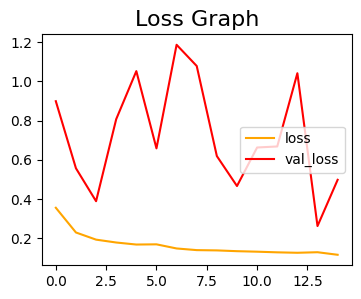

In [149]:
from matplotlib import pyplot as plt

plt.figure(figsize=(4,3))
plt.plot(cnn.history.history['loss'], color='orange', label='loss')
plt.plot(cnn.history.history['val_loss'], color='red', label='val_loss')
plt.title('Loss Graph', fontsize=16)
plt.legend(loc="center right")
plt.show()

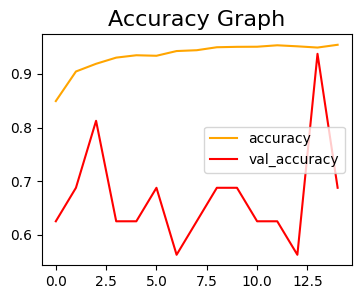

In [150]:
plt.figure(figsize=(4,3))
plt.plot(cnn.history.history['accuracy'], color='orange', label='accuracy')
plt.plot(cnn.history.history['val_accuracy'], color='red', label='val_accuracy')
plt.title('Accuracy Graph', fontsize=16)
plt.legend(loc='center right')
plt.show()

## Part 4 - Making predictions

In [151]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test', target_size = (64, 64), batch_size = 1, class_mode = 'binary', shuffle=False)

Found 624 images belonging to 2 classes.


In [167]:
import numpy as np

predictions = cnn.predict(test_set, steps=len(test_set), verbose=1)

y_pred = np.rint(predictions).astype(int)

labels = (test_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predicted_labels = [labels[p[0]] for p in y_pred]

624/624 [==============================] - 4s 7ms/step


## Part 5 - Showing Metrics

In [168]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_set.classes

### Showing The Classification Report

In [169]:
report = classification_report(y_true, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.96      0.70      0.81       234
           1       0.85      0.98      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.84      0.86       624
weighted avg       0.89      0.88      0.87       624



### Visualizing The Confusion Matrix

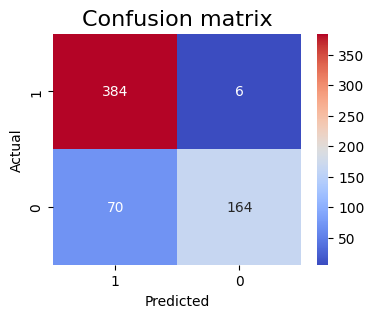

In [158]:
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d',cmap='coolwarm',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion matrix', fontsize=16)

ax.invert_yaxis()
ax.invert_xaxis()

plt.show()